In [32]:
%pylab inline
%load_ext autoreload
%autoreload 2
from preprocessing import load_seismic, load_horizon, find_closest_samples_to_horizon, extract_trace_above_below_horizon
from preprocessing import extract_chunk

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
near_stack_fname = '../dataset/glitne/segy/3d_nearstack.sgy'
far_stack_fname = '../dataset/glitne/segy/3d_farstack.sgy'
horizon_fname = '../dataset/glitne/horizon/Top_Heimdal_subset.txt'
min_inline, max_inline, step_inline = 1300, 1502, 2
min_xline, max_xline, step_xline = 1500, 2002, 2

well_i, well_j = 38, 138

samples_above, samples_below = 12, 52

## Loading the Seismic Near and Far Stack from Segy using SegyPy

In [34]:
near_seismic, twt = load_seismic(near_stack_fname, min_inline, max_inline, step_inline, min_xline, max_xline, step_xline, scaling=1e3)
far_seismic, _ = load_seismic(far_stack_fname, min_inline, max_inline, step_inline, min_xline, max_xline, step_xline, scaling=1e3)

SegyPY0.57:  readSegy : Trying to read ../dataset/glitne/segy/3d_nearstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ../dataset/glitne/segy/3d_nearstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data
SegyPY0.57:  readSegy : Trying to read ../dataset/glitne/segy/3d_farstack.sgy
SegyPY0.57:  getSegyHeader : succesfully read ../dataset/glitne/segy/3d_farstack.sgy
SegyPY0.57:  filesize=31438840
SegyPY0.57:  bps=    4
SegyPY0.57:  nd=7858810
SegyPY0.57:  readSegyData : Reading segy data
SegyPY0.57:  readSegyData : SEG-Y revision = 0
SegyPY0.57:  readSegyData : DataSampleFormat=1(IBM Float)
SegyPY0.57:   ns=250
SegyPY0.57:  readSegyData : Finished reading segy data


## Loading the interpreted horizon and getting an interpolated version

In [35]:
interpreted_horizon, horizon = load_horizon(horizon_fname, min_inline, max_inline, step_inline, min_xline, max_xline, step_xline, method="cubic")

### The picked horizon tops

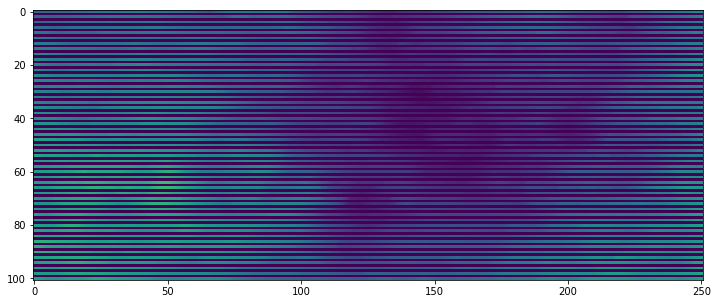

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(interpreted_horizon, vmin=2030, vmax=2200)

### The interpolated horizon tops

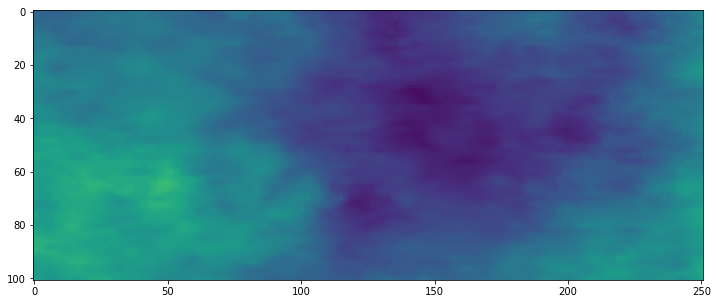

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.imshow(horizon, vmin=2030, vmax=2200)

## Extracting samples closest to the horizon and plotting trace at well

In [38]:
horizon_indices = find_closest_samples_to_horizon(horizon, twt, well_i)

(250, 101, 251)


(62, 0)

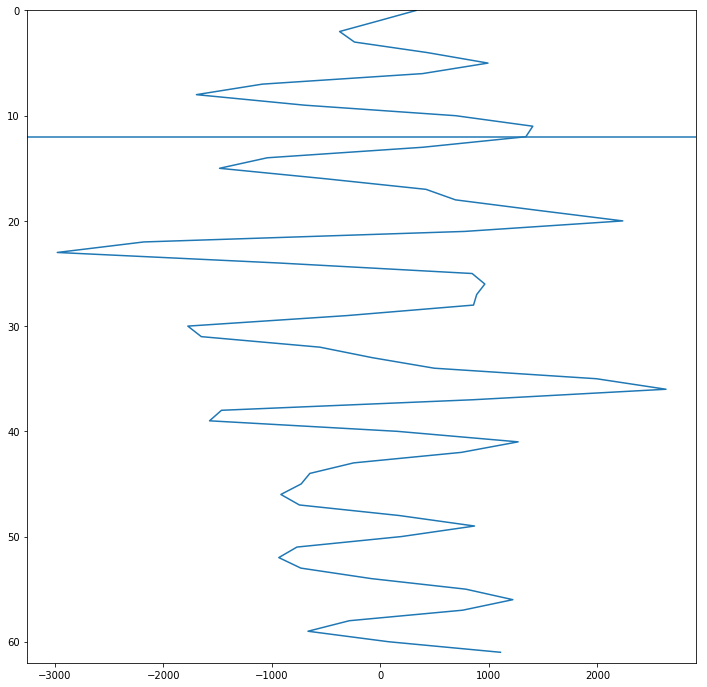

In [41]:
print(near_seismic.shape)
trace = extract_trace_above_below_horizon(near_seismic, horizon_indices, samples_above, samples_below, well_i, well_j)

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.plot(trace, range(samples_above+samples_below))
ax.axhline(samples_above)
ax.set_ylim(samples_above+samples_below, 0)

## Showing the line through the well and the well with the horizon

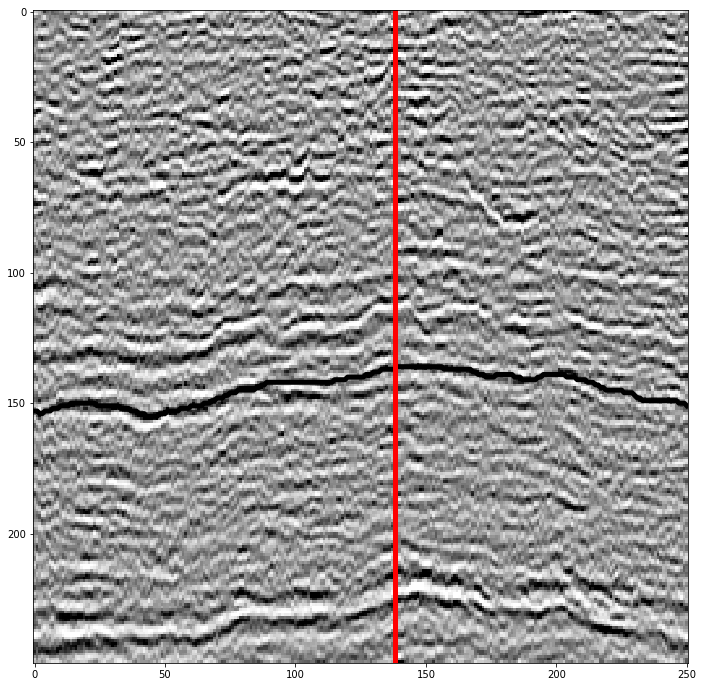

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
clip = abs(np.percentile(near_seismic, 0.8))
ax.imshow(near_seismic[:, well_i], cmap="Greys", vmin=-clip, vmax=clip)
ax.plot(range(len(horizon_indices)), horizon_indices, linewidth=5, color="black")
ax.axvline(well_j, color="red", linewidth=5)

## Flattening on the top horizon and extracting a chunk above and below the horizon

In [58]:
near_chunk = extract_chunk(near_seismic, twt, horizon, samples_above, samples_below)
far_chunk = extract_chunk(far_seismic, twt, horizon, samples_above, samples_below)

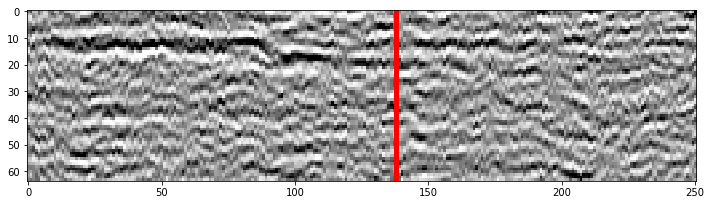

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
clip = abs(np.percentile(near_chunk, 0.8))
ax.imshow(near_chunk[well_i].T, cmap="Greys", vmin=-clip, vmax=clip)
ax.axvline(well_j, color="red", linewidth=5)

## Storing the extracted chunks as numpy files

In [67]:
np.save("../dataset/glitne/flattened/near_64_samples.npy", near_chunk)
np.save("../dataset/glitne/flattened/far_64_samples.npy", far_chunk)